

# Lab09: Differentiation and Integratio



In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
    
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate

--2022-04-14 08:46:46--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-14 08:46:46--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-04-14 08:46:46 (4.67 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



## Exercise 1

Создайте треугольный сигнал и напечатайте его. Примените `diff` к сигналу и напечатайте результат. Вычислите спектр треугольного сигнала, примените `differentiate` и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии `diff` и `differentiate` на этот сигнал?

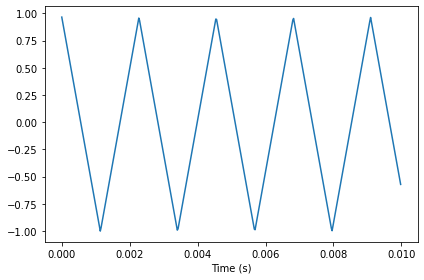

In [5]:
from thinkdsp import TriangleSignal

wave = TriangleSignal(freq=440).make_wave(duration=0.01, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

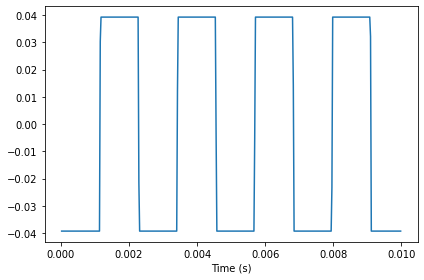

In [7]:
diff_wave = wave.diff()
diff_wave.plot()
decorate(xlabel='Time (s)')

В итоге получили прямоугольный сигнал с такой же частотой.


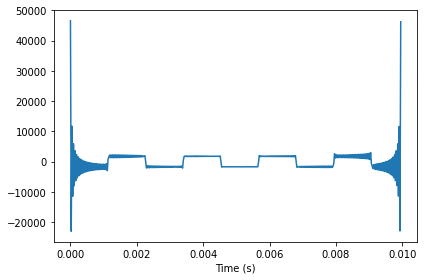

In [8]:
differentiate_wave = wave.make_spectrum().differentiate().make_wave()
differentiate_wave.plot()
decorate(xlabel='Time (s)')

Видно, что начало и конец интервала сильно зашумлены. Возможно, это связано с невозможностью определения произодной.

## Exercise 2

Создайте прямоугольный сигнал и напечатайте его. Примените `cumsum` и напечатайте результат. Вычислите спектр прямогоульного сигнала, примените `integrate` и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечайте его. Есть различия в воздействии `cumsum` и `integrate` на этот сигнал?

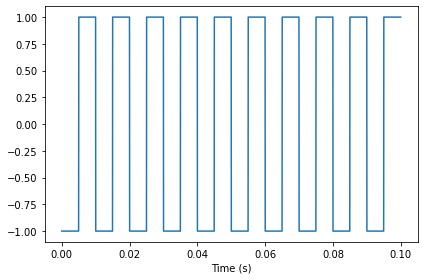

In [13]:
from thinkdsp import SquareSignal

wave = SquareSignal(freq=100).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

Кумулятивная сумма:

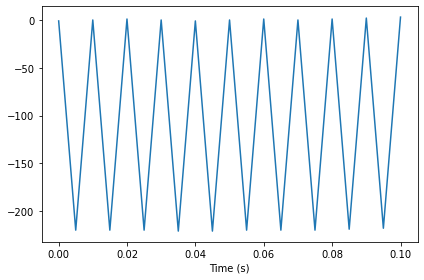

In [14]:
cumsum_wave = wave.cumsum()
cumsum_wave.plot()
decorate(xlabel='Time (s)')

Получили треугольный сигнал (скорей всего это он, но если чуть-чуть изменить сигнал то фаза смещается).

Интеграл спектра:

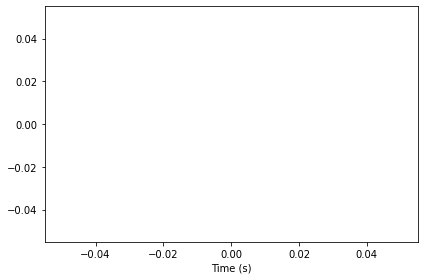

In [17]:
int_wave = wave.make_spectrum().integrate().make_wave()
int_wave.plot()
decorate(xlabel='Time (s)')

У нас получилось деление на ноль при f=0, результат в NumPy стал NaN. Поэтому решим это проблему в частном случае.

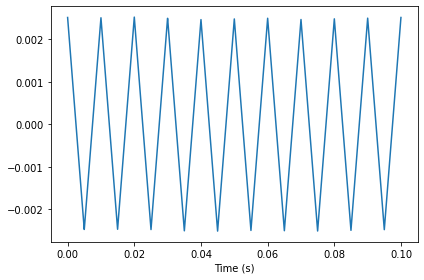

In [19]:
int_spec = wave.make_spectrum().integrate()
int_spec.hs[0] = 0
int_wave = int_spec.make_wave()
int_wave.plot()
decorate(xlabel='Time (s)')

Воспользуемся кодом автора и "сложим" два графика с изменением масштаба.

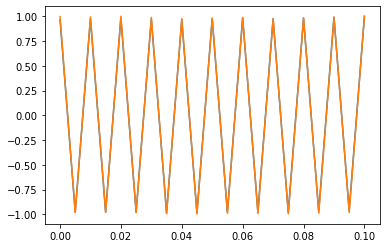

In [20]:
cumsum_wave.unbias()
cumsum_wave.normalize()
int_wave.normalize()
cumsum_wave.plot()
int_wave.plot()

Видим, что графики практически идентичны. Следовательно разные у них лишь амплитуды.

## Exercise 3

Создайте пилообразный сигнал, вычислите его спектр, а затем дважды примените `integrate`. Напечатйте результирующий сигнал и его спектр. Какова математическая форма сигнала? Почему он напоминает синусойду?

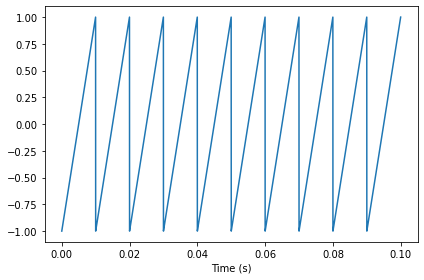

In [26]:
from thinkdsp import SawtoothSignal

wave = SawtoothSignal(freq=100).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

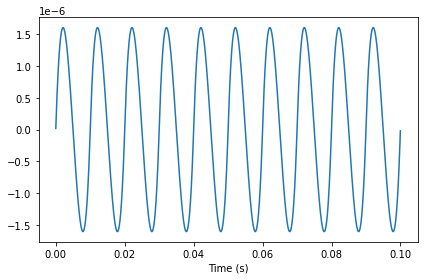

In [27]:
spectrum = wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0

wave1 = spectrum.make_wave()
wave1.plot()
decorate(xlabel='Time (s)')

Сигнал действительно напоминает синусойду. Причиной стала фильтрация низких чистот, за исключением основной.

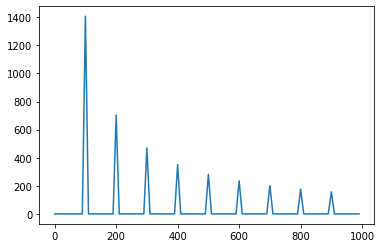

In [29]:
wave.make_spectrum().plot(high=1000)

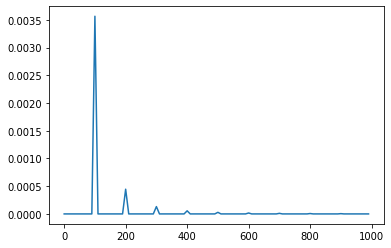

In [30]:
wave1.make_spectrum().plot(high=1000)

## Exercise 4

Создайте `CubicSignal`, определённый в `thinkdsp`. Вычислите вторую разность, дважды применив diff. Как выглядит результат? Вычислите вторую разность, дважды применив `differentiate` к спектру. Похожи ли результаты?
Распечатйте фильтры, соответсвующие второй разнице и второй производной. Сравните их.

Тут надо тонко подобрать параметры, чтобы сигнал красиво отображался при таком маленьком frametime.

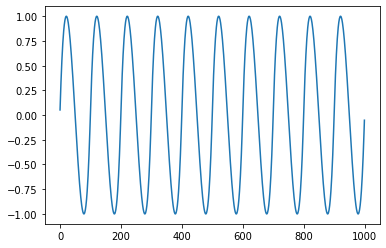

In [42]:
from thinkdsp import CubicSignal

wave = CubicSignal(freq=0.01).make_wave(duration=1000, framerate=1)
wave.plot()

Первая разность - пароболы.

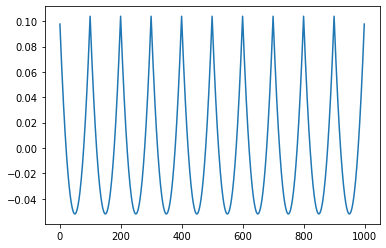

In [43]:
d1_wave = wave.diff()
d1_wave.plot()

Вторая разность - пилообразный сигнал.

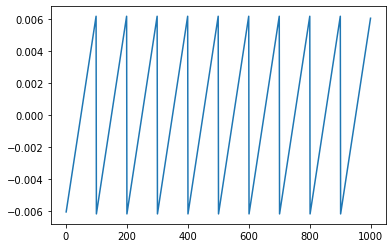

In [44]:
d2_wave = d1_wave.diff()
d2_wave.plot()

При двойном дифференцировании получаем звон в пилообразном сигнале, звон связан со сложностями в вычислении производной, как и ранее.

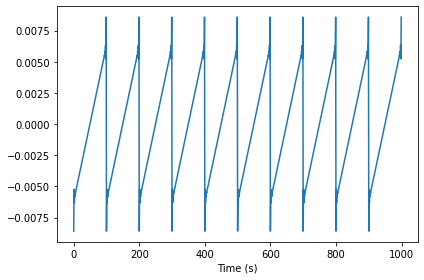

In [46]:
spectrum = wave.make_spectrum().differentiate().differentiate()
di_wave = spectrum.make_wave()
di_wave.plot()
decorate(xlabel='Time (s)')

Фильтры:

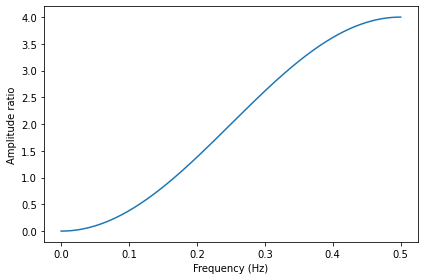

In [51]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

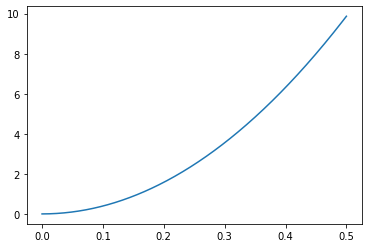

In [53]:
deriv_filter = wave.make_spectrum()
deriv_filter.hs = (2 * np.pi * 1j * deriv_filter.fs)**2
deriv_filter.plot()

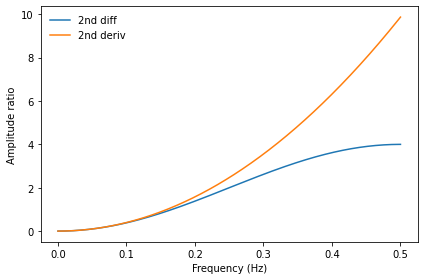

In [54]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Мы получили для ФВЧ, для усиления высокочастотных компонент. Производная является пароболой, поэтому она усиливает сильней. А Разность хорошо аппроксимирует только на низких частотах, а далее получаем существенное отклонение.